# EDA for the default risk dataset

In this notebook we conduct an analysis to better understand the default risk dataset. The goal is to understand what data is available, and what we can use as features for a classification model.
Note: to run this analysis notebook you need numpy, pandas, scipy, scikit-learn, pyarrow, and plotnine installed. You can install these in a conda environment using the conda package manager, or from command line:

- conda install -y numpy pandas scikit-learn scipy pyarrow
- conda install -c conda-forge plotnine

## Read and clean data

The following information is provided on the dataset by the UCI machine learning repository:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import numpy as np
import pandas as pd
from plotnine import * # generally not a good thing to do to import everything from a package. However it's ok for visualization purposes in an analysis.
import os
import scipy
# ignore some plotnine junk warnings. TODO: check what is generating the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to make jupyter print all outputs, not just the last one
from IPython.core.display import HTML # to pretty print pandas df and be able to copy them over (e.g. to ppt slides)

In [3]:
os.getcwd()

'/home/riccardo/repositories/teaching/DDB_AI/credit_risk_case_study'

In [4]:
os.listdir(os.path.join('..', 'dataset')) # independent of the platform (unix, windows)

['default of credit card clients.txt', 'default of credit card clients.xls']

In [5]:
credit_card_data_path = os.path.join("..", "dataset", "default of credit card clients.txt")
credit_card_df = pd.read_csv(credit_card_data_path, sep='\t')

In [6]:
print("There are {} rows and {} columns in the dataset".format(credit_card_df.shape[0], credit_card_df.shape[1]))

There are 30001 rows and 25 columns in the dataset


In [7]:
credit_card_df.head()
credit_card_df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
# fix the column names
colnames = credit_card_df.iloc[0].tolist()
credit_card_df.columns = [x.strip().lower() for x in colnames]
credit_card_df = credit_card_df.iloc[1:]
credit_card_df
credit_card_df.columns

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [9]:
credit_card_df.drop_duplicates(subset=['id']).shape[0] == credit_card_df.shape[0]

True

In [10]:
credit_card_df = credit_card_df.set_index("id")
credit_card_df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
id,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
# colums to integer type
for i in [x for x in credit_card_df.columns if x not in ['sex', 'education', 'marriage'] ]:
    credit_card_df[i]= credit_card_df[i].astype(int)

In [12]:
credit_card_df.dtypes

limit_bal                      int64
sex                           object
education                     object
marriage                      object
age                            int64
pay_0                          int64
pay_2                          int64
pay_3                          int64
pay_4                          int64
pay_5                          int64
pay_6                          int64
bill_amt1                      int64
bill_amt2                      int64
bill_amt3                      int64
bill_amt4                      int64
bill_amt5                      int64
bill_amt6                      int64
pay_amt1                       int64
pay_amt2                       int64
pay_amt3                       int64
pay_amt4                       int64
pay_amt5                       int64
pay_amt6                       int64
default payment next month     int64
dtype: object

In [13]:
credit_card_df[[ 'sex', 'education', 'marriage']].describe()

,sex,education,marriage
count,30000,30000,30000
unique,2,7,4
top,2,2,2
freq,18112,14030,15964


In [14]:
credit_card_df.describe()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [15]:
n_nulls = credit_card_df.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_nulls[0]} rows with null values in this dataset")

There are 0 rows with null values in this dataset


There are no null values in this dataset. For a real-life dataset (such as the the energy consumption forecast that we will discuss later), this is rarely the case. There are a couple of things that are possible if there are null values:
- drop the column if there's too many missing values
- impute the missing values otherwise. For a categorical variable you can use for instance the mode, while for a numeric variable you can use e.g. the mean. However it's always crucial to first understand your data and on that basis determine if the imputation makes sense.
- for instance, in the Funda dataset the **perceeloppervlakte** is missing from apartments. That's because for apartments perceeloppervlakte is the same as the woonoppervlakte. Hence in this case it would make more sense to just impute the perceeloppervlakte column with the value of the woonoppervlakte if the house is an apartment.

In [16]:
# let's rename the target and pay_0
credit_card_df = credit_card_df.rename(columns={'default payment next month': 'default',
'pay_0': 'pay_1'
})
credit_card_df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

I am going to create a function to rename column values on the fly to human-readable format. This will be handy later.

In [17]:
credit_card_df['marriage'].unique()
credit_card_df['sex'].unique()
credit_card_df['education'].unique()

array(['1', '2', '3', '0'], dtype=object)

array(['2', '1'], dtype=object)

array(['2', '1', '3', '5', '4', '6', '0'], dtype=object)

In [18]:
def NameRemapper(df, copy=True):
    renamings = {
        'sex': {
            '1': 'male',
            '2': 'female'
        },
        'education': {
            '0': 'unknown_0',
            '1': 'graduate school',
            '2': 'university',
            '3': 'high school',
            '4': 'others',
            '5': 'unknown_5',
            '6': 'unknown_6'
        },
        'marriage': {
            '0': 'others_0',
            '1': 'married',
            '2': 'single',
            '3': 'others'
        }
    }
    if copy is True:
        df = df.copy()
    for i in renamings.keys():
        if i in df.columns:
            df[i] = df[i].map(renamings[i])
    return df

In [19]:
(
    credit_card_df.groupby('default')
    .size()
    .reset_index(name='N')
    .assign(total = lambda x: x.N.sum())
    .assign(p = lambda x: x.N / x.total * 100)
)

,default,N,total,p
0,0,23364,30000,77.88
1,1,6636,30000,22.12


- We have an *imbalanced classification dataset*. This means that the target label that we want to predict is not distributed evenly (i.e., 50% of the observations from class 0 and 50% of the observations from class 1). Here the negative class (=no default) dominates, which is typical for these kind of financial applications

- The more imbalanced the dataset, the harder it is for standard classification algorithms to achieve good performance. Most algorithm's performance peaks at a perfectly balanced dataset and degrades the more imbalance there is.

- In our case the imbalance is not too bad. In practice, you can have datasets with 5% or fewer observations from the positive class for this kind of applications.

- There are many options on how to deal with imbalance and it's an active area of research. Some possibilities are:
  - downsample the dominant class. In this case, we could downsample from the 0 class so as to achieve parity with the 1 class. The downside of this, of course, is that we discard data that could hold relevant information for the predictive task at hand

  - generate artificial data from the minority class. A method to do this is, e.g., the smote method: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html, see https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ for an explanation.

See below a visual explanation of the smote technique to oversample the minority class. For a member of the minority class x, we calculate its k-nearest-neighbors OF THE SAME CLASS and generate m synthetic minority class examples by randomly picking a point on the line connecting them.

!['Smote diagram'](img/smote_diagram.png)

For the present dataset, however, the imbalance is not that severe. So we continue we the dataset without undersampling/oversampling.

In [20]:
credit_card_df = credit_card_df.assign(age_cat = pd.cut(credit_card_df['age'], 5))

In [21]:
def generate_freq_table(df, variable = ['sex', 'education']):
    dfs = []
    for i in variable:
        df_count = (
            df.groupby(i, observed=False)
            .size()
            .reset_index(name='N')
            .assign(var = i)
            .rename(columns={i: 'category'})
        )
        dfs.append(df_count)
        res = pd.concat(dfs)
        res['category'] = res['category'].astype(str)
    return res

In [22]:
generate_freq_table(credit_card_df, ['sex', 'education', 'age_cat'])

,category,N,var
0,1,11888,sex
1,2,18112,sex
0,0,14,education
1,1,10585,education
2,2,14030,education
3,3,4917,education
4,4,123,education
5,5,280,education
6,6,51,education
0,"(20.942, 32.6]",13388,age_cat


In [23]:
def generate_freq_plot(freq_table):
    return (
        ggplot(freq_table, aes(x='var', y='N', fill='category')) +
        geom_col(stat='identity', position='dodge')
    )

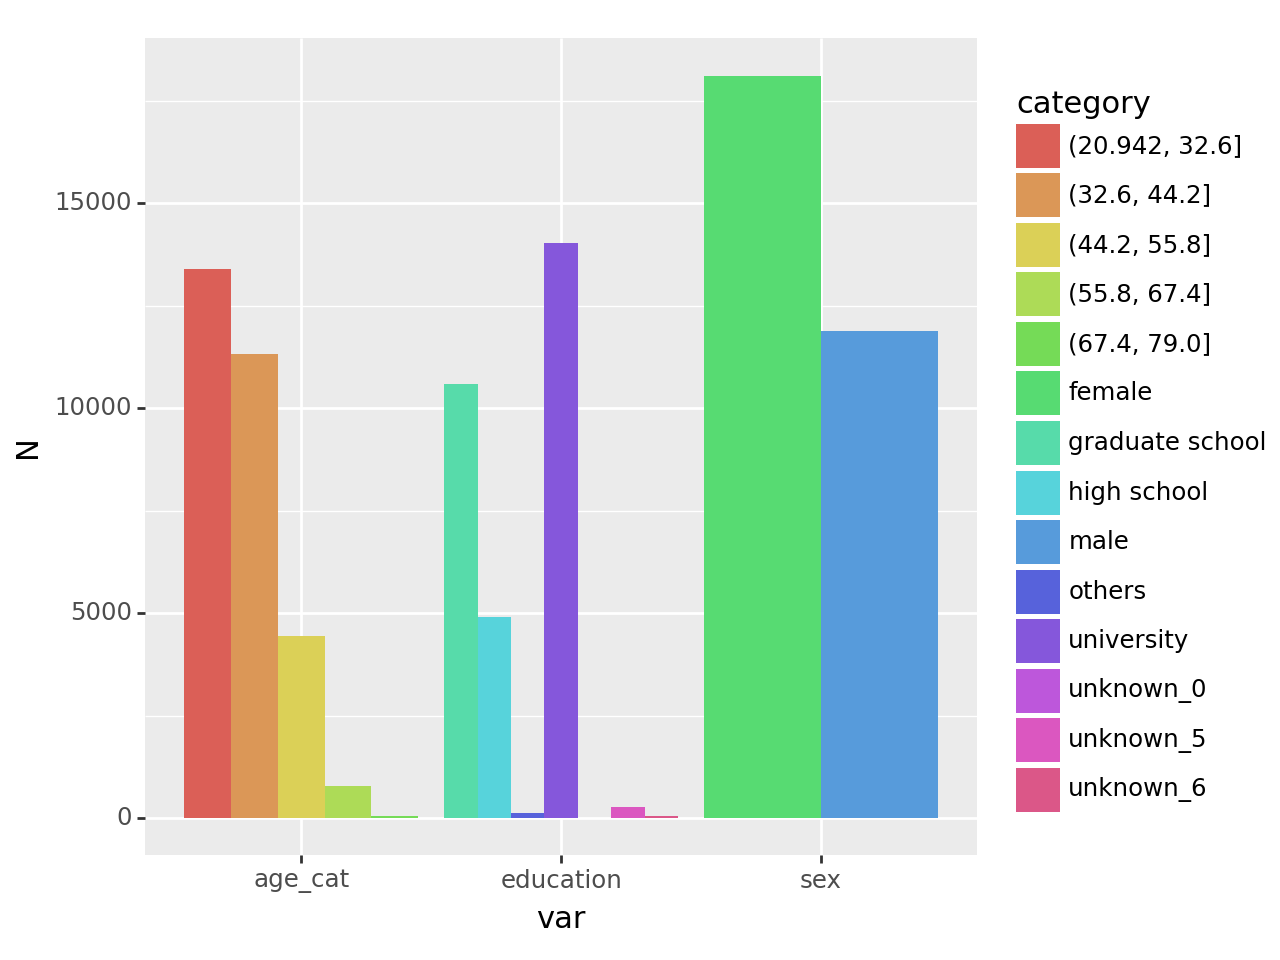

<Figure Size: (640 x 480)>

In [24]:
generate_freq_plot(generate_freq_table(NameRemapper(credit_card_df), [ 'sex', 'education', 'age_cat']))

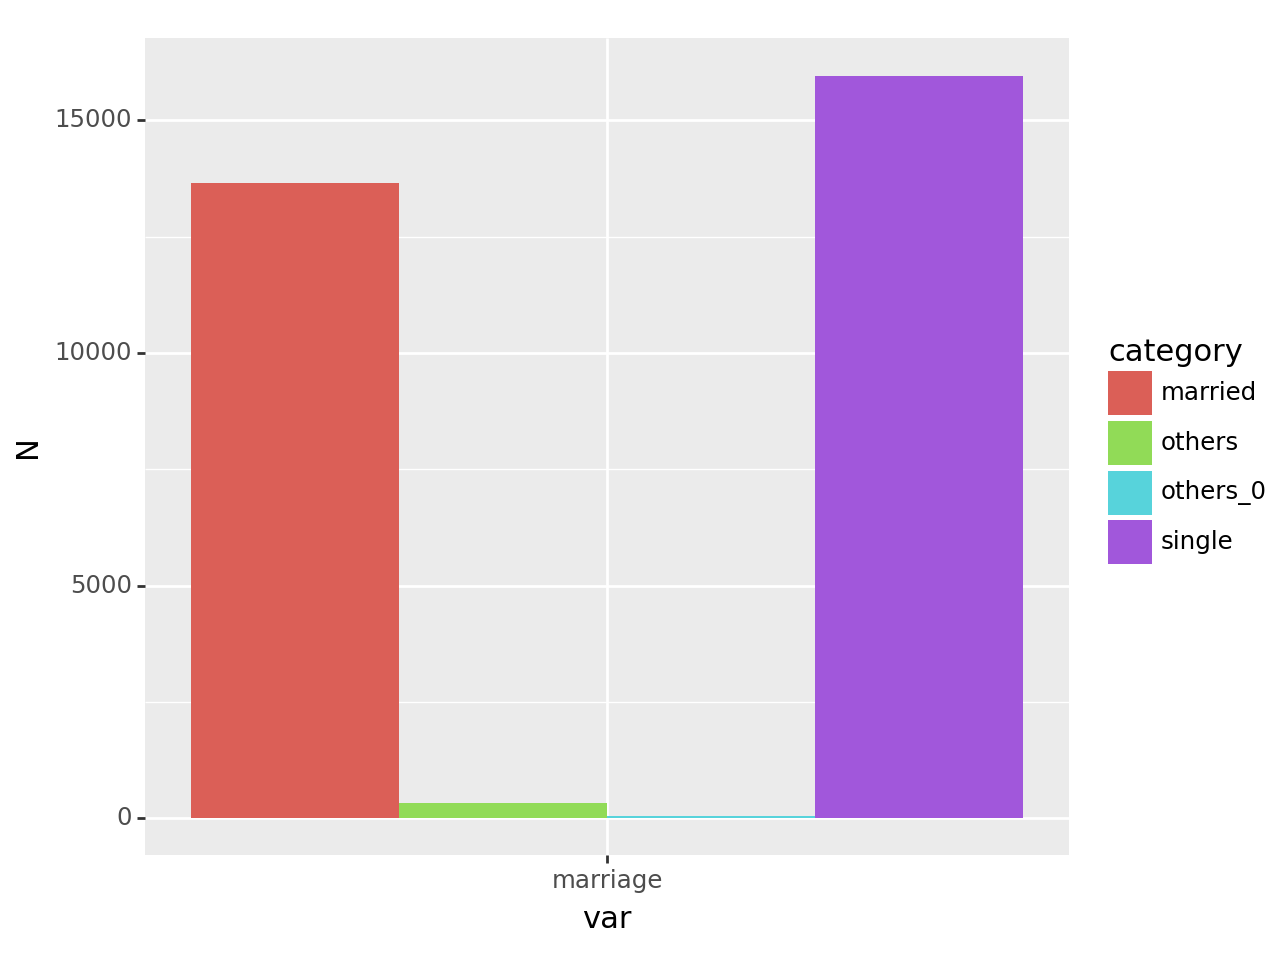

<Figure Size: (640 x 480)>

In [25]:
generate_freq_plot(generate_freq_table(NameRemapper(credit_card_df), ['marriage']))

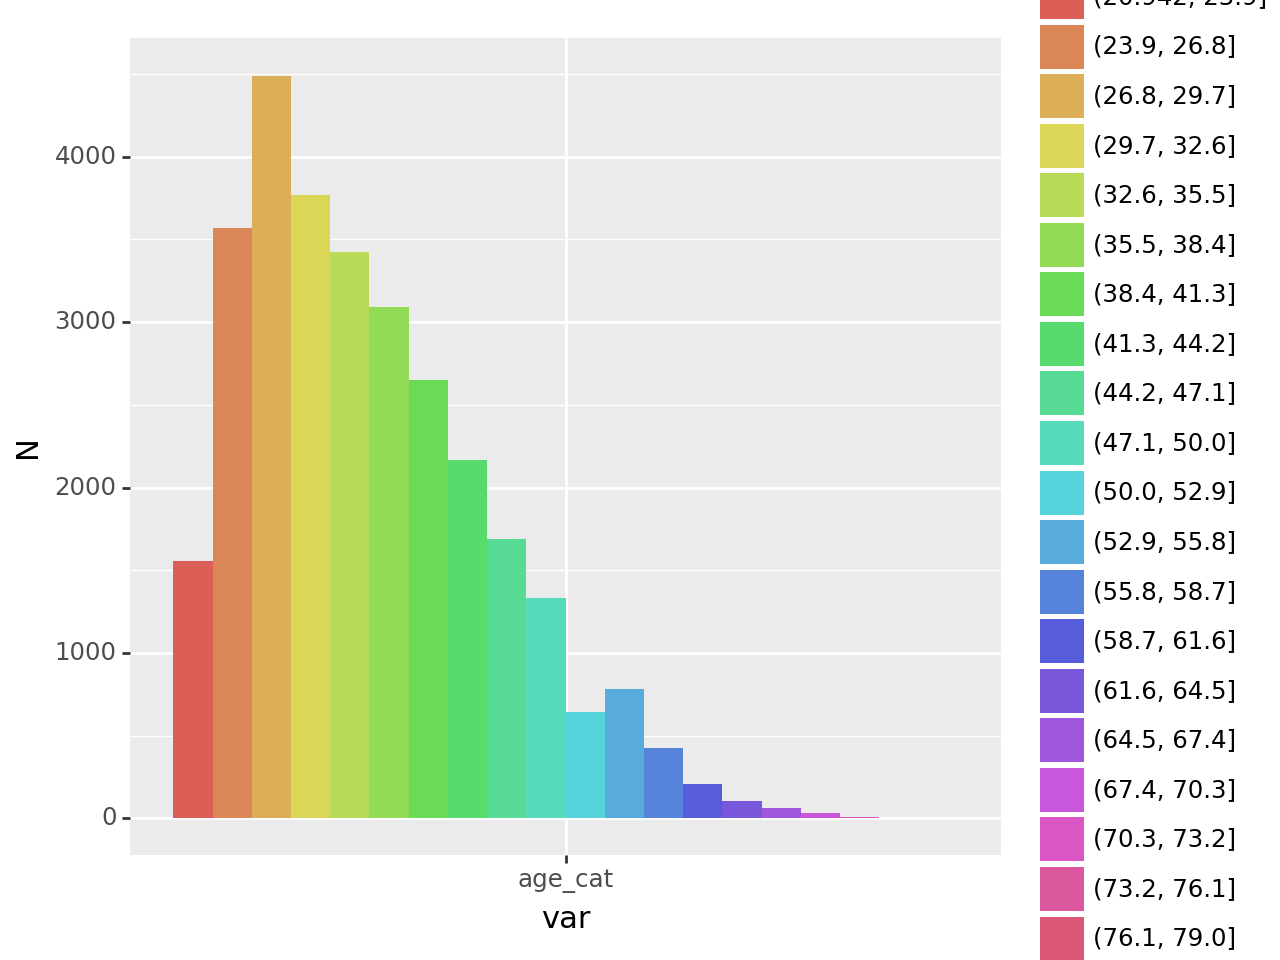

<Figure Size: (640 x 480)>

In [26]:
credit_card_df = credit_card_df.assign(age_cat = pd.cut(credit_card_df['age'], 20))
generate_freq_plot(generate_freq_table(credit_card_df, ['age_cat']))

- The age variable is quite right skewed. This is normal with this kind of variables. However, often transforming variables so that they follow more closely a normal distribution can help with the performance of the model. 

- This can be achieved by applying e.g. a log or square root transformation to the variable.

- More generally, one can use a box-cox transformation https://en.wikipedia.org/wiki/Power_transform from scipy.stats.boxcox to attempt to achieve a closer distribution to normality

This is particularly the case if the target to be predicted is continuous and very right skewed, as it's often the case with e.g. house prices. In these cases, transforming the target so that it follows more closely a normal distribution, and predicting the transformed target rather than the raw target, can have a positive impact on the performance of the model. In this case, one trains a model to predict e.g. the log of the target, and to generate the actual prediction one applies the inverse transformation. Let's see an example on the age variable.

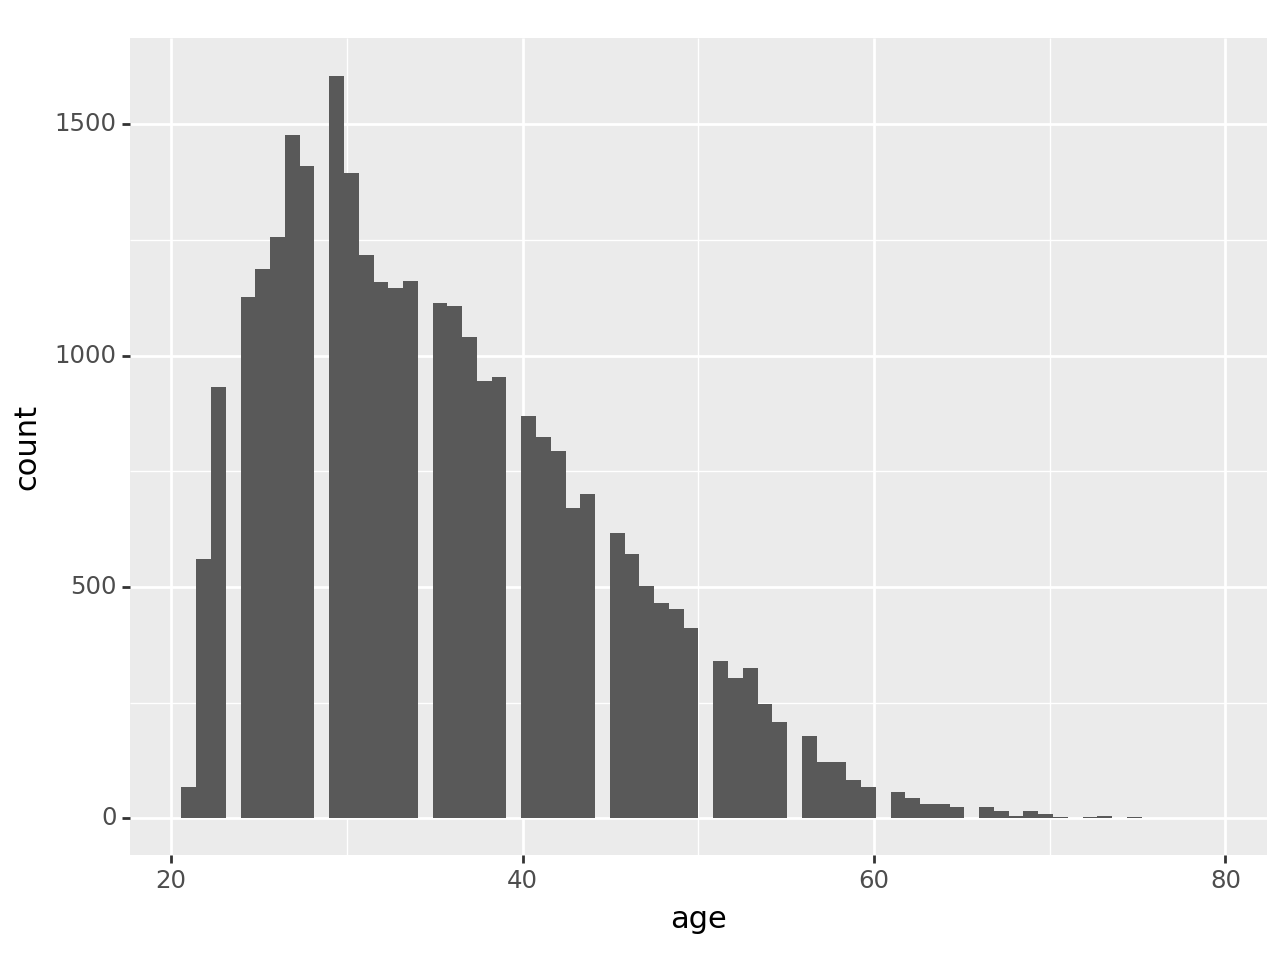

<Figure Size: (640 x 480)>

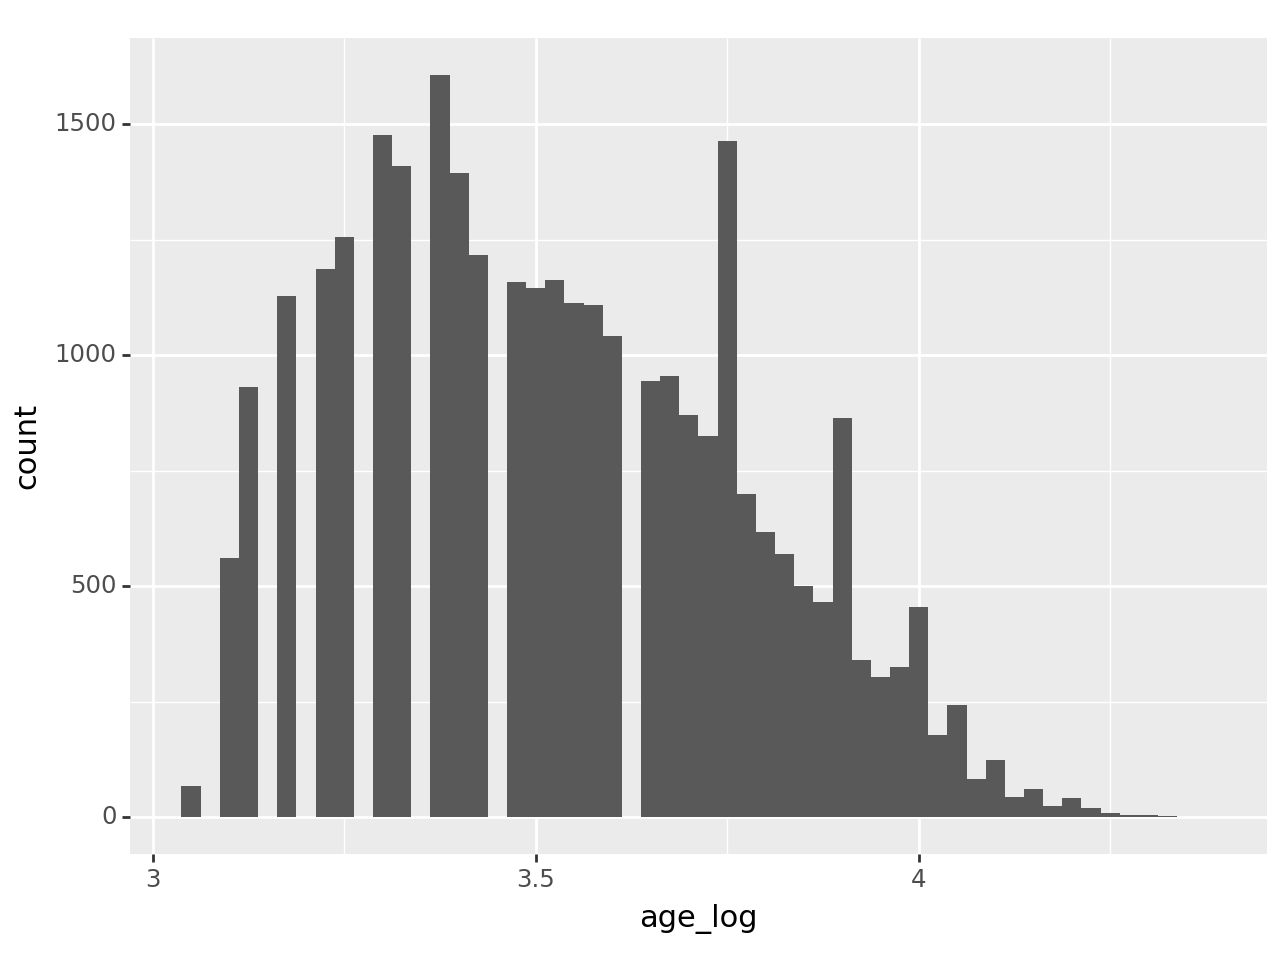

<Figure Size: (640 x 480)>

In [27]:
# first we look at what the log transformation does
(
    ggplot(credit_card_df, aes(x='age')) +
    geom_histogram()
)

(
    ggplot(credit_card_df.assign(age_log = lambda x: np.log(x.age)), aes(x='age_log')) +
    geom_histogram()
)

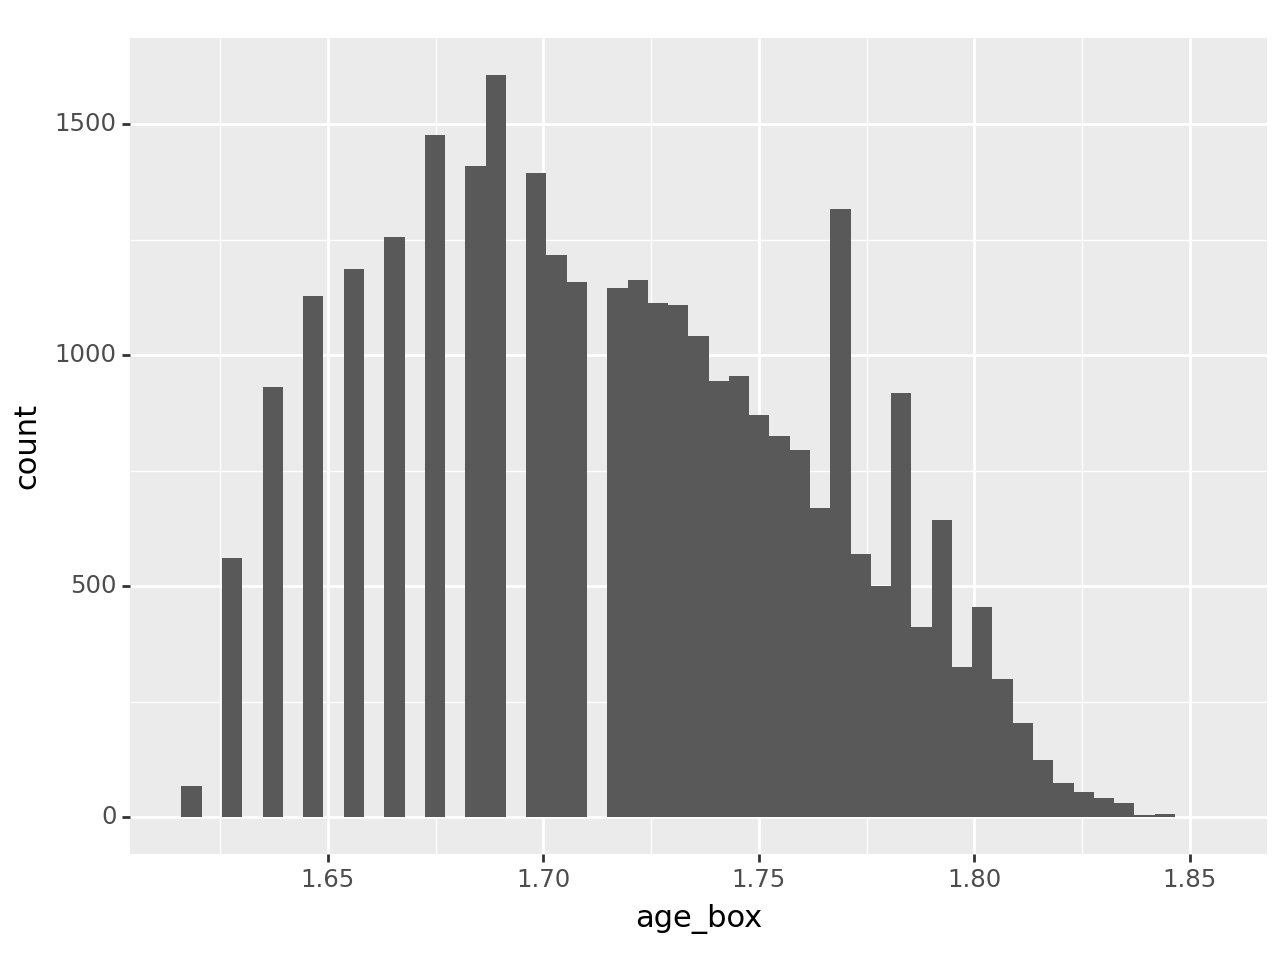

<Figure Size: (640 x 480)>

Here's how the inverse of the box-coxed transformed age looks:
[24. 26. 34. ... 37. 41. 46.]
Which is identical to the original value of age:
[24 26 34 ... 37 41 46]


In [28]:
# let's try a boxcox transform
# first we find the box-cox transforms of the age column
age_boxed = scipy.stats.boxcox(credit_card_df.age) # returns a tuple with (1) vector of transformed values, (2) lambda value found by the optimizer. The lambda value specifies the exact closed-form of the transforming function
age_boxed_v = age_boxed[0] # the transformed values
age_boxed_lambda = age_boxed[1] # the lambda value found by the optimizer

# the age variable now looks closer to normal, although the gaps in the range show that this approach has limited 
# value for an inherently discrete variable like age. However, for continuous variables this can substantially improve the performance of 
# your model
(
    ggplot(credit_card_df.assign(age_box = age_boxed_v), aes(x='age_box')) +
    geom_histogram()
)

# we can then apply the inverse transform using box_cox_inv and passing in the lambda value. This will transform
# the box-coxed age back to the original vector
age_boxed_inv = scipy.special.inv_boxcox(age_boxed_v, age_boxed_lambda)
print("Here's how the inverse of the box-coxed transformed age looks:")
print(age_boxed_inv)
print("Which is identical to the original value of age:")
print(credit_card_df.age.to_numpy())

We can calculate a frequency table with pd.crosstab, in order to evaluate where in the covariate space the highest concentration of defaults occur, and which variables are likely to be good class separators (predictors).

In [29]:
def calculate_freq_table(df, variables):
    var_series = [df[i] for i in variables]
    freq_table = pd.crosstab(var_series, df['default'])
    freq_table = freq_table.assign(N_obs = freq_table.sum(axis=1))
    freq_table = freq_table.assign(p = freq_table[1]/freq_table.N_obs)
    percentage_table = freq_table[['N_obs','p']]
    percentage_table.columns.name = None
    percentage_table = percentage_table.reset_index()
    return freq_table, percentage_table

In [30]:
freq_table_sex_marriage = calculate_freq_table(credit_card_df, ['sex', 'marriage'])

,sex,marriage,N_obs,p
0,male,others_0,14,0.142857
1,male,married,5190,0.259345
2,male,single,6553,0.226614
3,male,others,131,0.305344
4,female,others_0,40,0.075000
5,female,married,8469,0.219625
6,female,single,9411,0.197216
7,female,others,192,0.229167


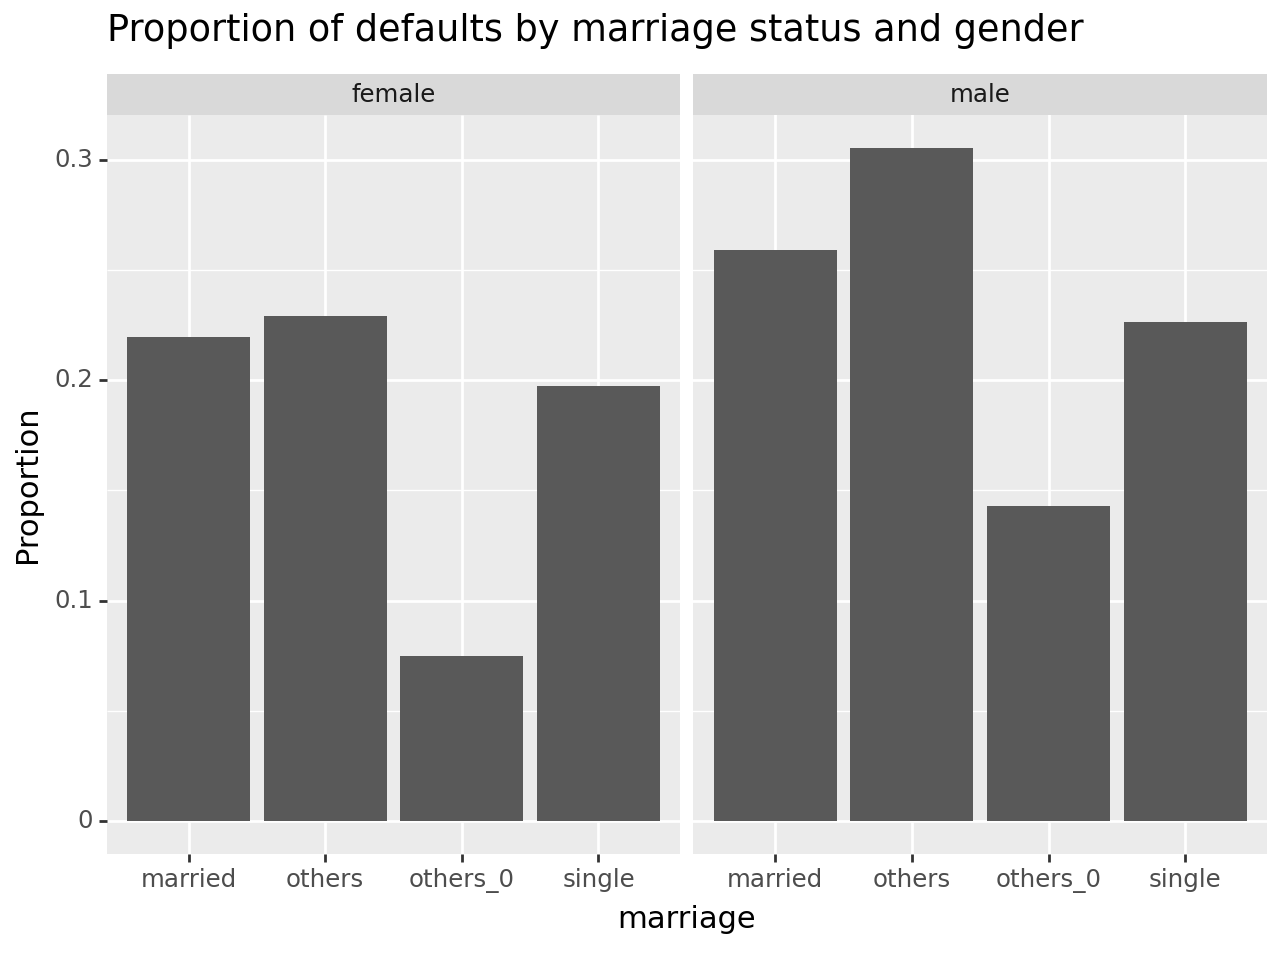

<Figure Size: (640 x 480)>

In [31]:
NameRemapper(freq_table_sex_marriage[1])

(
    ggplot(
    NameRemapper(freq_table_sex_marriage[1]), aes(x='marriage', y='p')) + geom_bar(stat='identity', position='dodge')
    + facet_wrap('sex')
    + labs(y='Proportion')
    + ggtitle('Proportion of defaults by marriage status and gender')
)

looks like marriage category others_0 has lower default risk than the other categories.

In [32]:
NameRemapper(calculate_freq_table(credit_card_df, ['sex'])[1])

,sex,N_obs,p
0,male,11888,0.241672
1,female,18112,0.207763


It looks like males are more likely to default than females in this dataset. Is this statistically significant? Assuming that the sample of customers is a random sample and the observations are independent (which they are in this case), we could run a z-test of proportions to check if this difference is significant (https://online.stat.psu.edu/stat415/lesson/9/9.4).

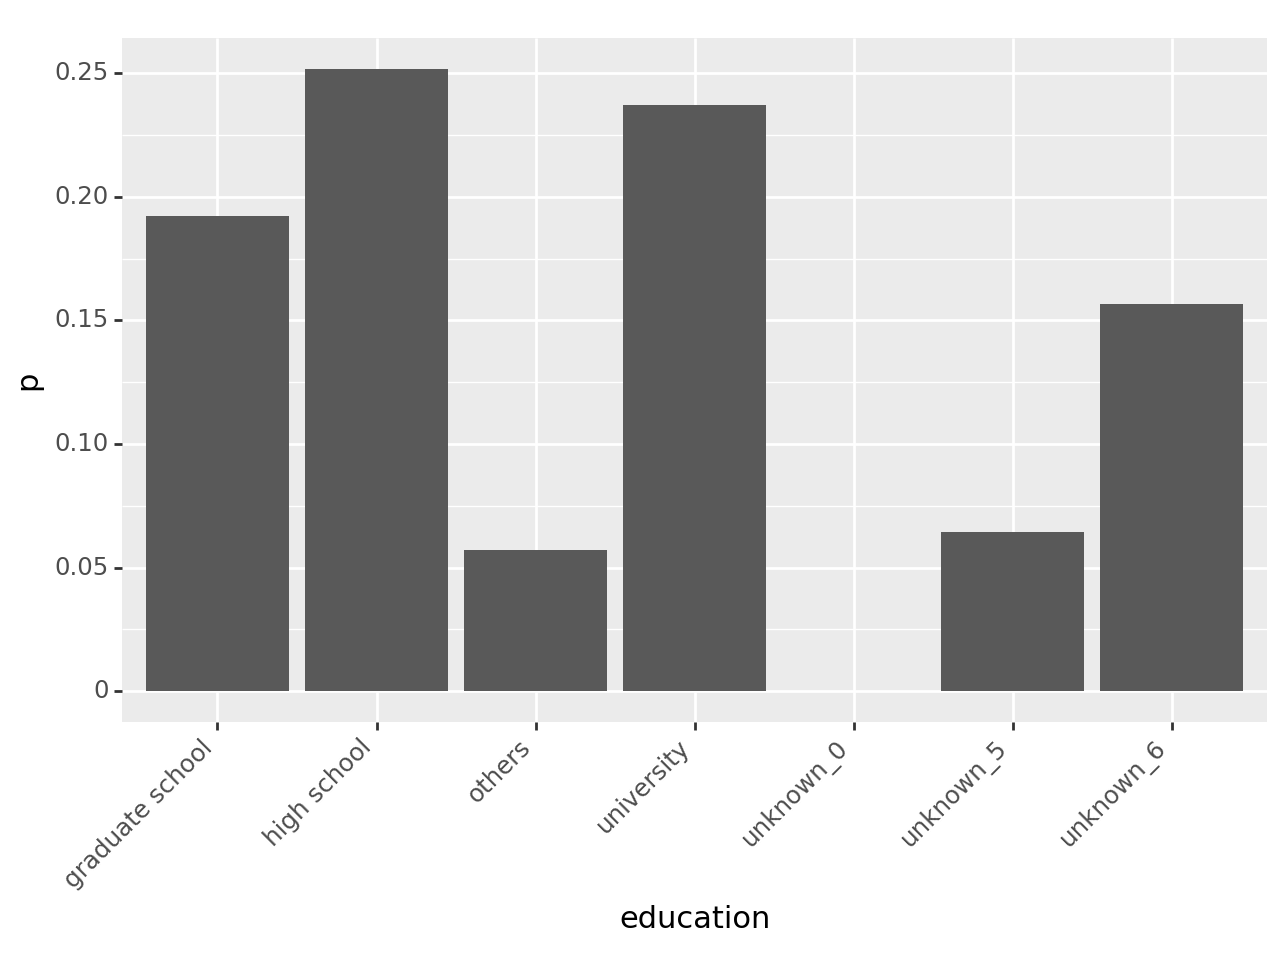

<Figure Size: (640 x 480)>

In [33]:
(
    ggplot(NameRemapper(calculate_freq_table(credit_card_df, ['education'])[1]),
    aes(x = 'education', y='p')
    ) + geom_bar(stat='identity')
    +  theme(axis_text_x=element_text(rotation=45, hjust=1))
)

For the education variable, we see that there's slightly more defaults for high school and university than for, e.g., graduates.

Let's explore the payment delay information. Let's create a few more features:
- max delay that the user incurred in
- number of delays that the user incurred in

In [34]:
max_delay = (credit_card_df[[x for x in credit_card_df.columns if x.startswith('pay_') and 'amt' not in x]]).max(axis=1)
credit_card_df['max_delay'] = max_delay
freq_delay = ((credit_card_df[[x for x in credit_card_df.columns if x.startswith('pay_') and 'amt' not in x]]) >= 0).sum(axis=1)
credit_card_df['freq_delay'] = freq_delay

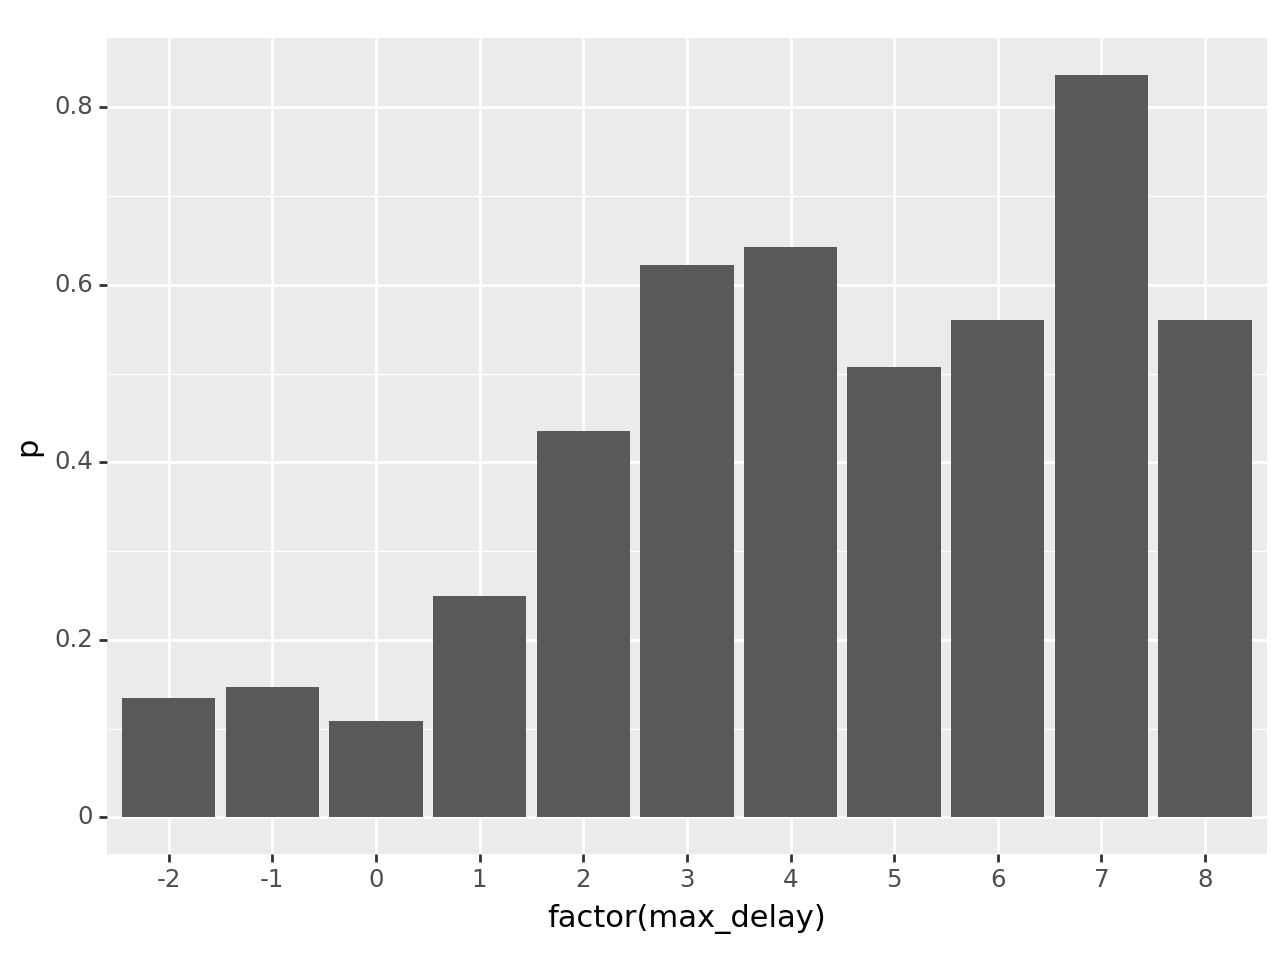

<Figure Size: (640 x 480)>

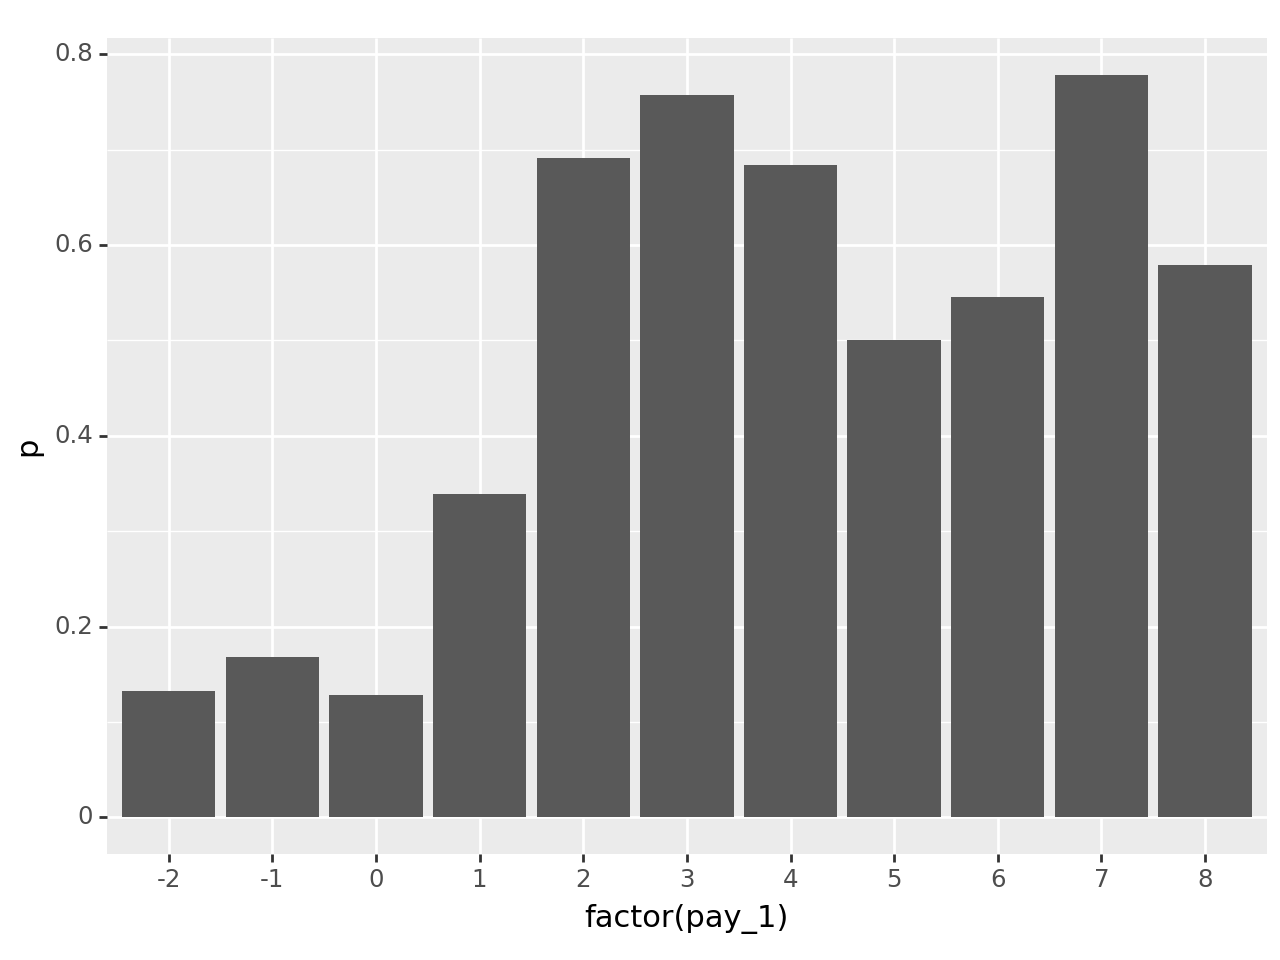

<Figure Size: (640 x 480)>

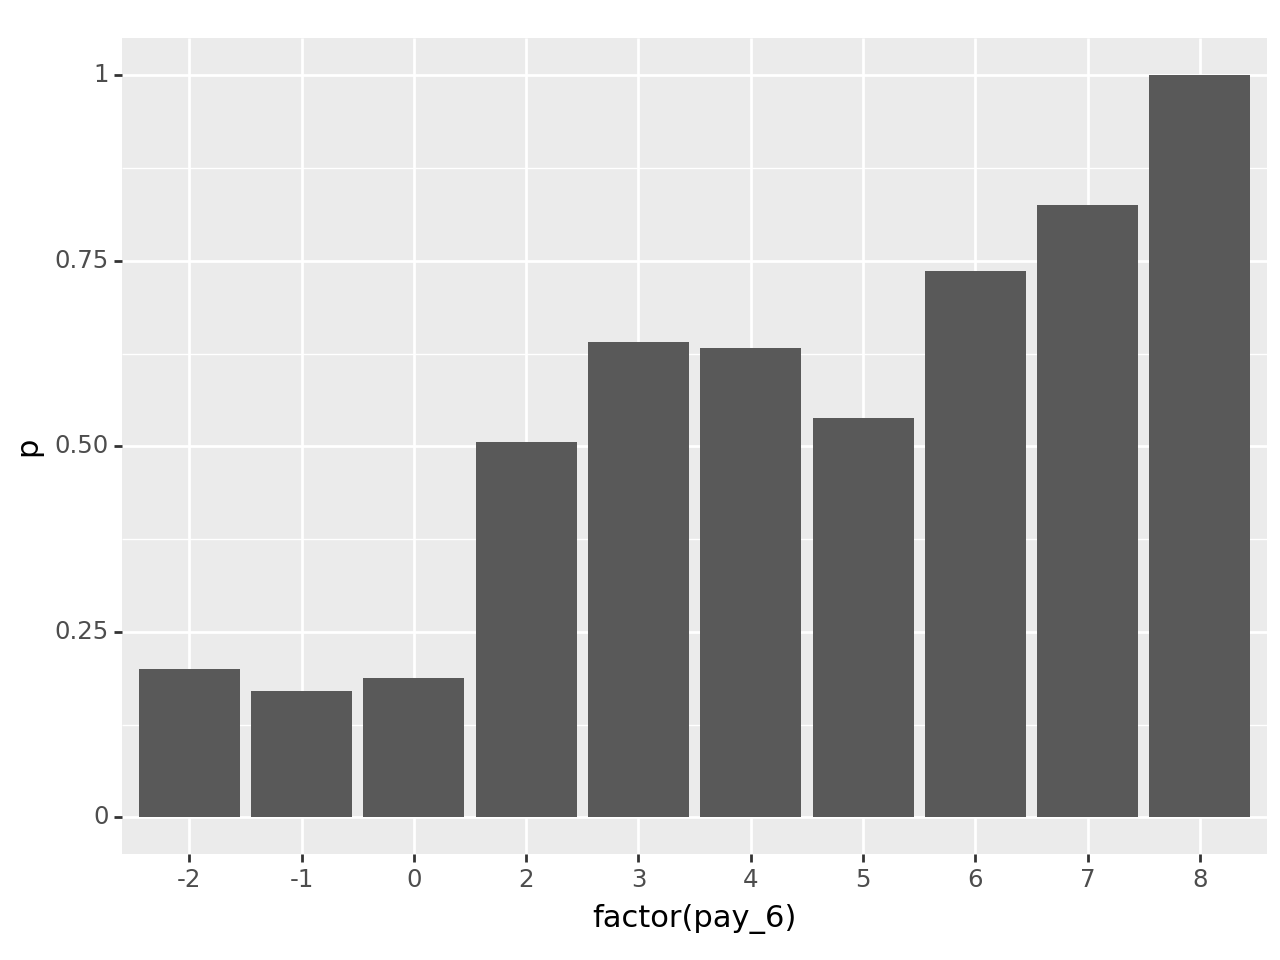

<Figure Size: (640 x 480)>

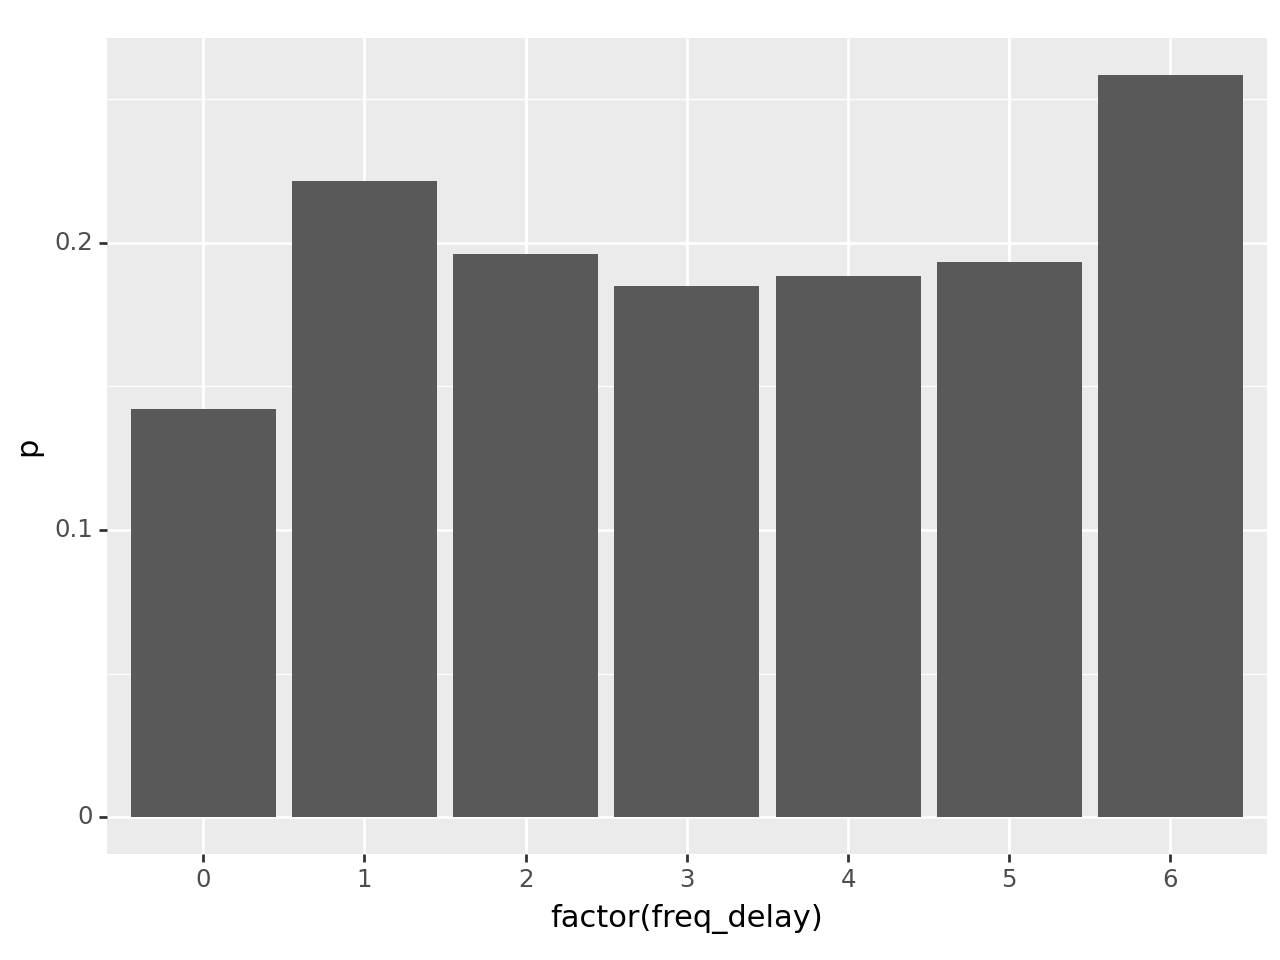

<Figure Size: (640 x 480)>

In [35]:
(
    ggplot(calculate_freq_table(credit_card_df, ['max_delay'])[1], aes(x='factor(max_delay)', y='p')) +
    geom_bar(stat='identity')
)


(
    ggplot(calculate_freq_table(credit_card_df, ['pay_1'])[1], aes(x='factor(pay_1)', y='p')) +
    geom_bar(stat='identity')
)

(
    ggplot(calculate_freq_table(credit_card_df, ['pay_6'])[1], aes(x='factor(pay_6)', y='p')) +
    geom_bar(stat='identity')
)


(
    ggplot(calculate_freq_table(credit_card_df, ['freq_delay'])[1], aes(x='factor(freq_delay)', y='p')) +
    geom_bar(stat='identity')
)


We see that max_delay (the maximum delay accrued by the customer in the time period analyzed) looks highly correlated with the target we want to predict, which is not surprising: intuitively, the higher the max_delay a customer as accrued, the more likely it is that that customer will default. On the other hand, the freq_delay feature does seem to have only a week relation to the target.

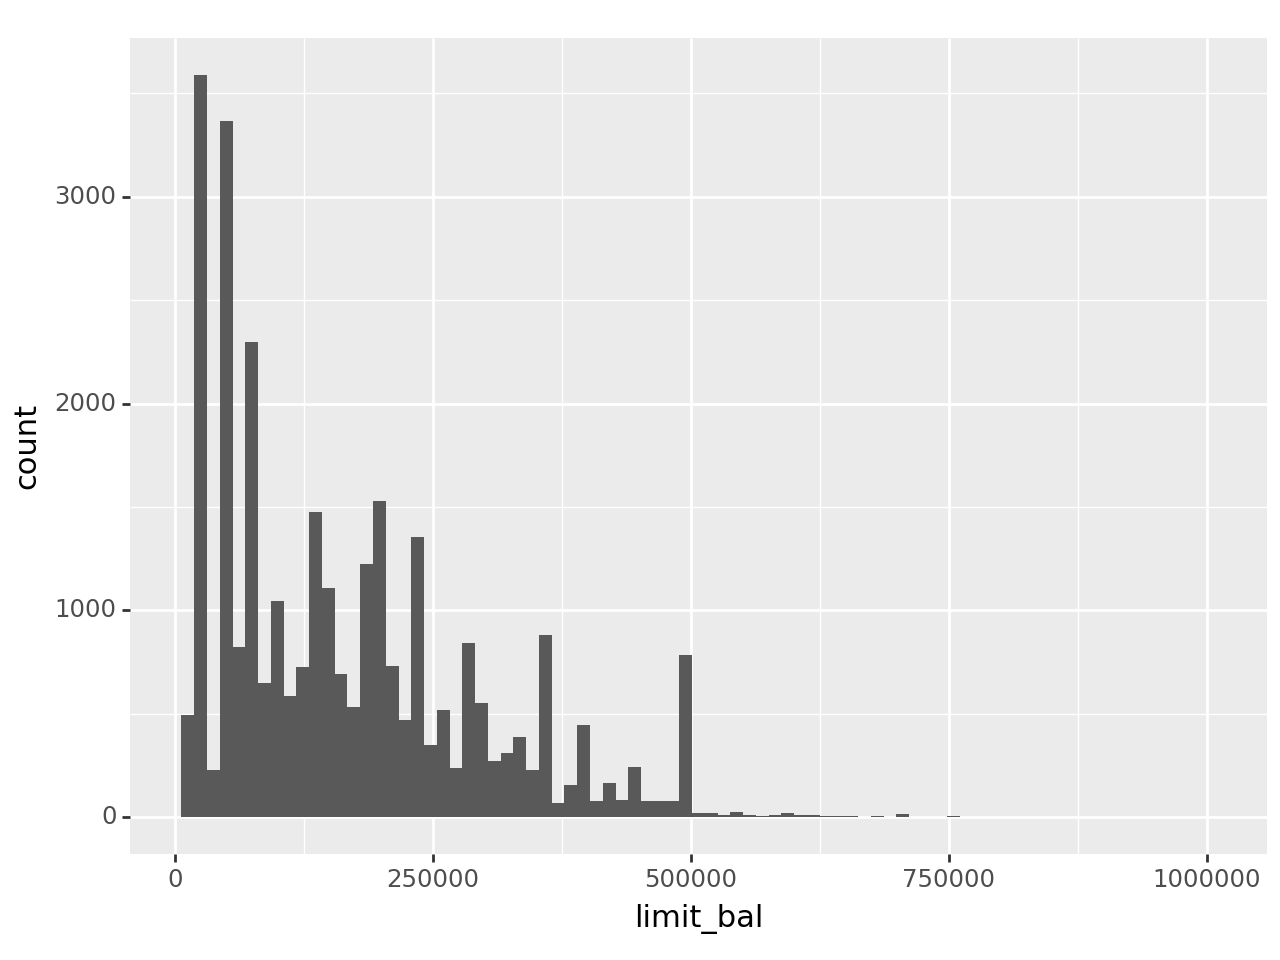

<Figure Size: (640 x 480)>

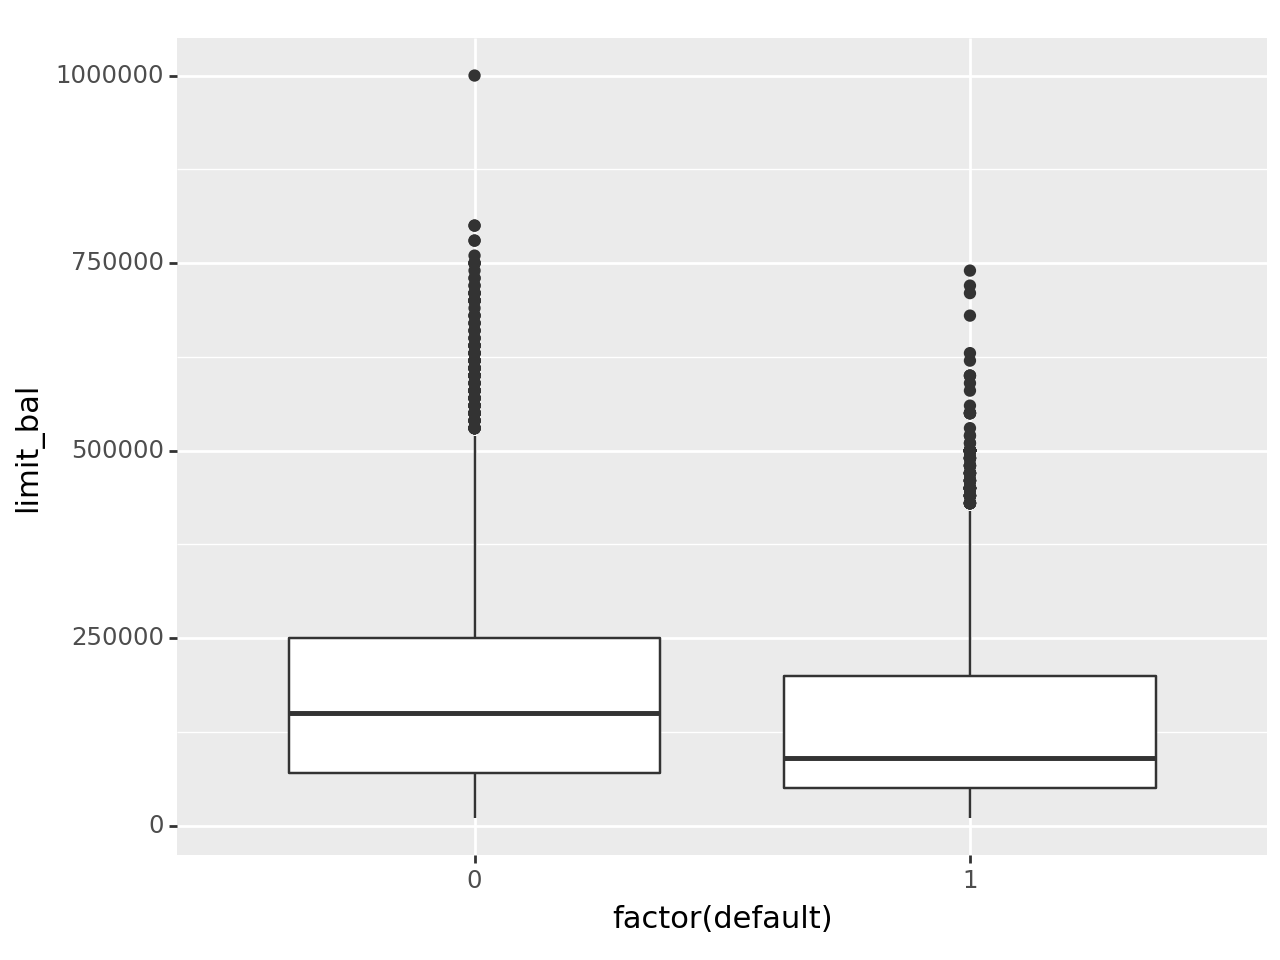

<Figure Size: (640 x 480)>

In [36]:
# let's look at limit balance. Also very skewed.
(
    ggplot(credit_card_df, aes(x = 'limit_bal'))
    + geom_histogram()
)

# boxplot of limit balance vs default
(
    ggplot(credit_card_df)
    + geom_boxplot(aes(x='factor(default)', y='limit_bal'))
)

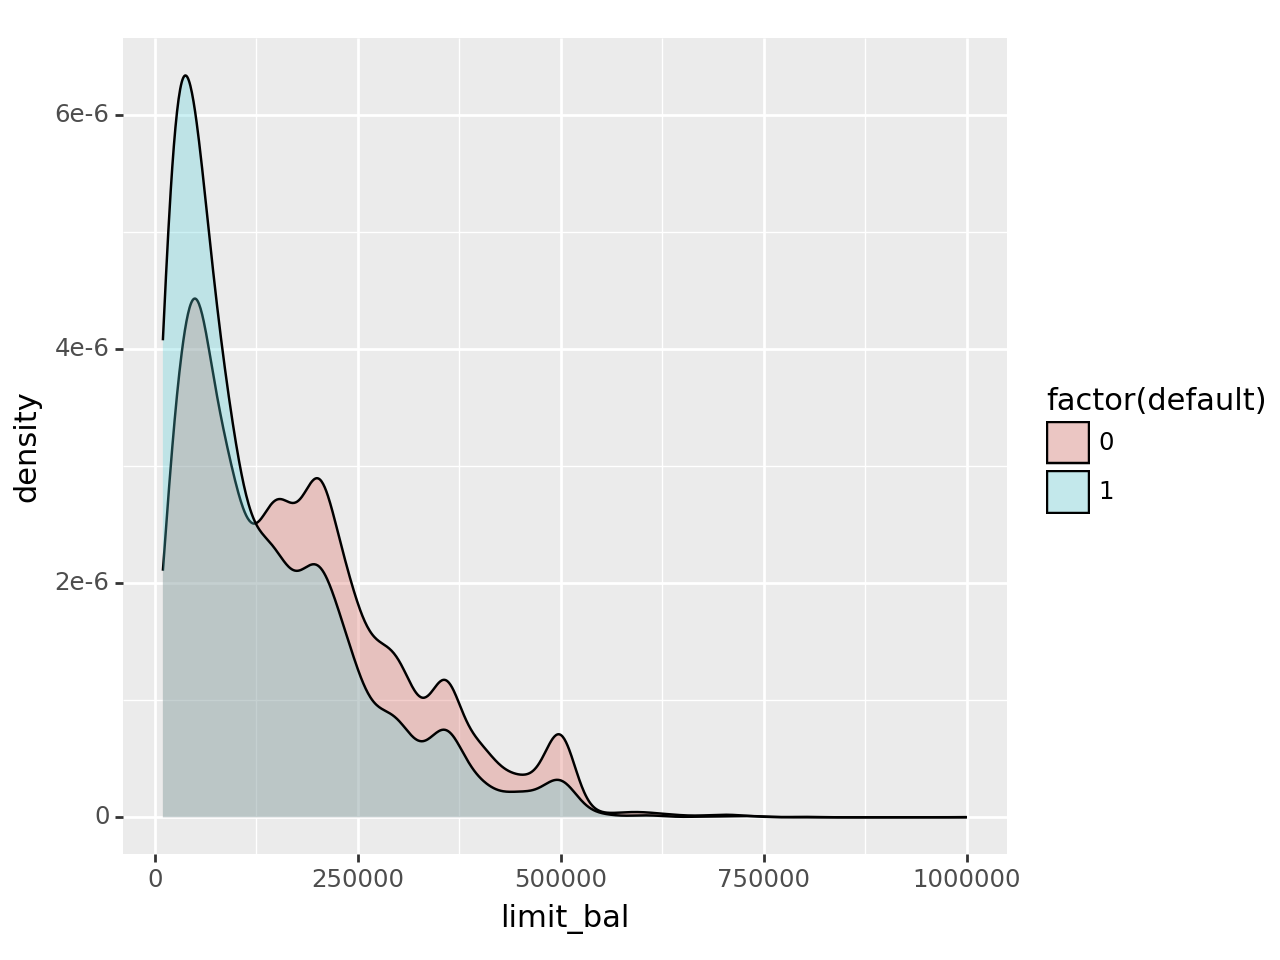

<Figure Size: (640 x 480)>

In [37]:
# nicer: density plot of limit balance vs default
(
    ggplot(credit_card_df.sample(15000), aes(x='limit_bal', fill='factor(default)'))
    + geom_density(alpha=0.3)
)

From the boxplot and (even better) the density plot above, we see that the limit balance (the amount of credit a customer is allowed to have at the bank) does influence whether a customer will default: we see that while a limit balance below ~100.000 means a higher risk of default, a limit balance above that threshold reduces the risk of default (most likely because the customer has more leeway to recover his/her finances). So limit balance is likely to be a useful feature for the model.

The density plots above are a useful technique to display numerical variables against a categorical target, e.g., we could look at bill_amt1 against out default target:

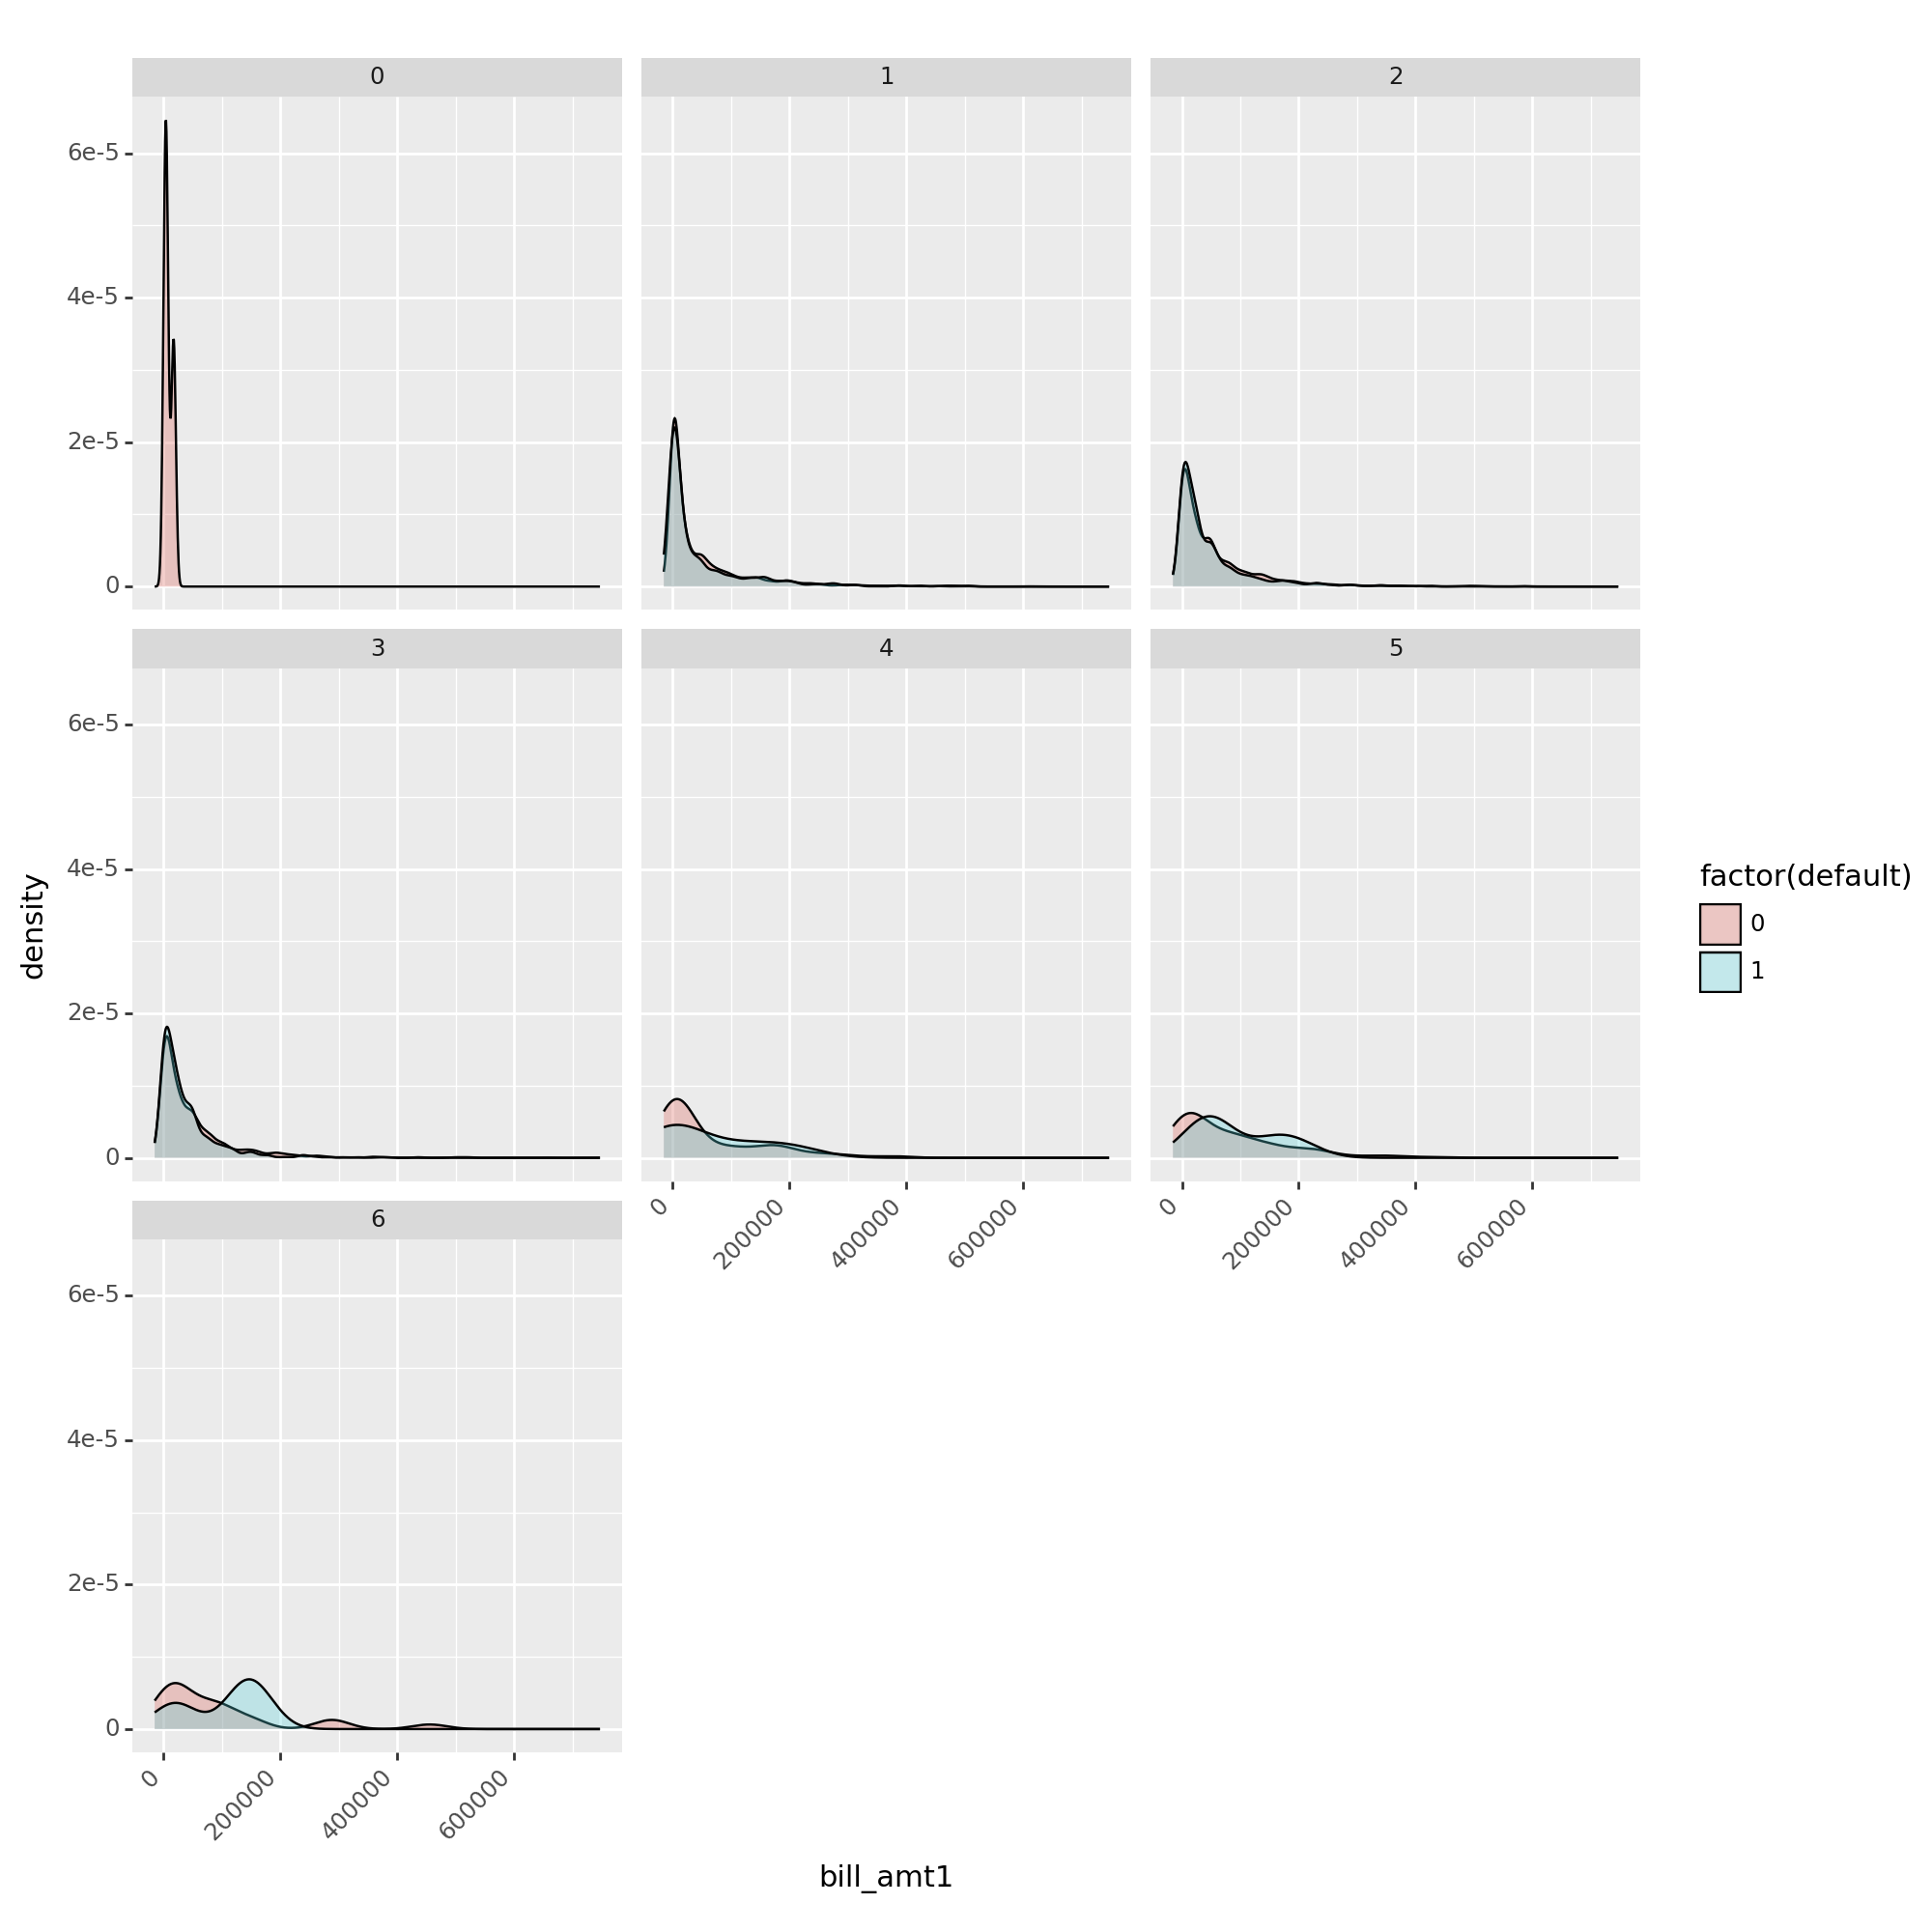

<Figure Size: (1000 x 1000)>

In [38]:
(
    ggplot(credit_card_df.sample(15000), aes(x='bill_amt1', fill='factor(default)'))
    + geom_density(alpha=0.3)
    + facet_wrap('education')
    +  theme(axis_text_x=element_text(rotation=45, hjust=1))
     + theme(figure_size=(10, 10))  # here you define the plot size
)

We now save the dataset to disk that we will use for modelling

In [39]:
credit_card_df = credit_card_df.drop(['age_cat'], axis=1)

We now write the dataset to disk for modelling.
There are various formats that can be used to store intermediate datasets for a ML pipeline: csv, pickle, feather, parquet...
We will use feather here.

In [40]:
output_path = os.path.join('..', 'dataset', 'modelling_dataset.feather')
credit_card_df.reset_index().to_feather(output_path)